In [94]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import re

In [110]:
import pandas as pd

# Leer el archivo usando una codificación alternativa, como 'ISO-8859-1' (Latin-1)
tweets_df = pd.read_csv('tw_source.csv', encoding='ISO-8859-1', header =None)
tweets_df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [111]:
tweets_df.columns= ['Number','ID','timestamp','Query','User','tweet']

In [112]:
tweets_df

,Number,ID,timestamp,Query,User,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [113]:
#Leemos dataset, notar que se debe seleccionar el encoding correcto
#df= tweets_df['tweet']
#df.shape

In [114]:
[palabra for palabra in df[1000].split(' ') if '@' in palabra]

['@JonathanRKnight', '@silver_tulip27']

In [115]:
from collections import Counter

In [116]:
sub_dataset = df[:10000]
sub_dataset

0       @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       is upset that he can't update his Facebook by ...
2       @Kenichan I dived many times for the ball. Man...
3         my whole body feels itchy and like its on fire 
4       @nationwideclass no, it's not behaving at all....
                              ...                        
9995                                      Aww that's sad 
9996      stupid dvds stuffing up the good bits in jaws. 
9997    @Dandy_Sephy No. Only close friends and family...
9998    CRAP! After looking when I last tweeted... WHY...
9999                            Its Another Rainboot day 
Name: tweet, Length: 10000, dtype: object

In [117]:
lista_menciones = []
filas_per_at = {}
cont = 0

for tweet in tweets_df['tweet']:
    ats_in_tweet = ([palabra for palabra in tweet.split(' ') if '@' in palabra])
    lista_menciones.extend(ats_in_tweet)

    try: 
        ultimo_at = ats_in_tweet[len(ats_in_tweet) -1]
        filas_per_at.setdefault(ultimo_at,[]).append(cont)
    except:
        pass
    finally:
        cont = cont +1

In [118]:
filas_per_at

{'@switchfoot': [0,
  122396,
  204318,
  532683,
  665568,
  792721,
  854059,
  904038,
  914966,
  1374695,
  1504823],
 '@Kenichan': [2,
  57116,
  199137,
  472424,
  792505,
  792852,
  801886,
  822783,
  910747,
  994374,
  995103,
  1143200,
  1186198],
 '@nationwideclass': [4,
  837013,
  838724,
  861205,
  1083926,
  1084349,
  1136751,
  1245113,
  1353577,
  1534845],
 '@Kwesidei': [5],
 '@LOLTrish': [7, 1533551],
 '@Tatiana_K': [8, 91831, 206627, 225987, 456474, 592898, 899631, 1055959],
 '@twittera': [9, 639600, 898489],
 '@caregiving': [12, 1015505],
 '@octolinz16': [13],
 '@smarrison': [14],
 '@iamlilnicki': [15],
 '@LettyA': [18, 198834, 326284],
 '@FakerPattyPattz': [19, 1251980],
 '@alydesigns': [20],
 '@angry_barista': [22],
 '@alielayus': [31],
 '@julieebaby': [33, 502801],
 '@HumpNinja': [34, 979506],
 '@cocomix04': [36],
 '@MissXu': [37,
  314455,
  476832,
  486332,
  804695,
  849531,
  861941,
  911735,
  912205,
  913773,
  971299,
  1007081,
  1027091,
  1

In [119]:
Counter(lista_menciones).most_common(4)[1:]

[('@mileycyrus', 4310), ('@tommcfly', 3837), ('@ddlovato', 3349)]

In [120]:
filas_mileycyrus =filas_per_at['@mileycyrus']
filas_mileycyrus[:10]

[1021, 2014, 2073, 2080, 2156, 2220, 2275, 2461, 3859, 4191]

In [127]:
corpus_mileycyrus = tweets_df.iloc[filas_mileycyrus,[2,5]].reset_index()
corpus_mileycyrus= corpus_mileycyrus.drop('index', axis=1)
corpus_mileycyrus['len'] = corpus_mileycyrus['tweet'].apply(len)
corpus_mileycyrus

,timestamp,tweet,len
0,Mon Apr 06 23:30:57 PDT 2009,@mileycyrus hahaha dont be like that one time ...,107
1,Tue Apr 07 00:45:20 PDT 2009,"@mileycyrus i have the same problem, but it's ...",137
2,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...,72
3,Tue Apr 07 00:49:44 PDT 2009,@mileycyrus I would too if it meant spending a...,100
4,Tue Apr 07 00:56:41 PDT 2009,@mileycyrus AWWW u seriously have the cutest d...,112
...,...,...,...
4096,Tue Jun 16 06:52:58 PDT 2009,Hey @mileycyrus I voted for you at the teen ch...,104
4097,Tue Jun 16 07:31:21 PDT 2009,@mileycyrus http://twitpic.com/7f5fy - I love ...,112
4098,Tue Jun 16 07:55:55 PDT 2009,@mileycyrus i see the photos of your KISS iss ...,74
4099,Tue Jun 16 08:04:20 PDT 2009,@mileycyrus i am definitley definitley getting...,139


In [128]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

# Descargar los recursos necesarios de nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Definir las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Inicializar el stemmer y lematizador
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Función para limpiar y procesar el texto (remover stopwords, hacer stemming y lemmatización)
def preprocess_text(text):
    # Eliminar menciones (@usuario) y caracteres especiales
    text = re.sub(r'@\w+', '', text)  # Eliminar menciones
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Eliminar caracteres no alfabéticos
    text = text.lower()  # Convertir a minúsculas
    
    # Tokenizar (separar por palabras)
    tokens = text.split()
    
    # Remover stopwords y aplicar stemming y lemmatización
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Aplicar el preprocesamiento al corpus (columna de tweets)
corpus_mileycyrus['processed_tweet'] = corpus_mileycyrus['tweet'].apply(preprocess_text)

# Verificar algunos resultados
print(corpus_mileycyrus[['tweet', 'processed_tweet']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mack\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mack\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               tweet  \
0  @mileycyrus hahaha dont be like that one time ...   
1  @mileycyrus i have the same problem, but it's ...   
2  @mileycyrus I guess counting sheep didn't work...   
3  @mileycyrus I would too if it meant spending a...   
4  @mileycyrus AWWW u seriously have the cutest d...   

                                     processed_tweet  
0  hahaha dont like one time ny got min sleep got...  
1                       problem let see count work z  
2        guess count sheep didnt work hope get sleep  
3       would meant spend day heaven wmi mom get see  
4  awww u serious cutest dog miley sorri hope u g...  


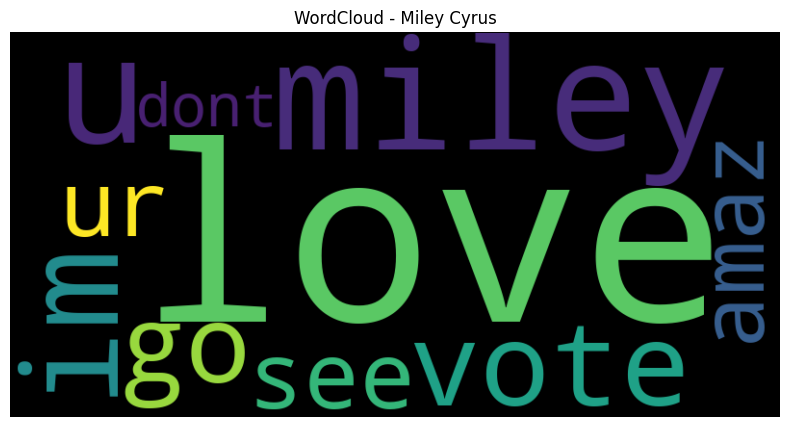

In [133]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir todos los tweets procesados en un solo texto
all_text = ' '.join(corpus_mileycyrus['processed_tweet'])

# Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=10).generate(all_text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Miley Cyrus")
plt.show()


In [130]:
filas_Tommcfly =filas_per_at['@tommcfly']
filas_Tommcfly[:10]

[1789, 2514, 3029, 3524, 3783, 4916, 6465, 6541, 8109, 10060]

In [131]:
corpus_tommcfly = tweets_df.iloc[filas_Tommcfly,[2,5]].reset_index()
corpus_tommcfly= corpus_tommcfly.drop('index', axis=1)
corpus_tommcfly['len'] = corpus_tommcfly['tweet'].apply(len)
corpus_tommcfly

,timestamp,tweet,len
0,Tue Apr 07 00:26:52 PDT 2009,@tommcfly Good morning Tom! Why can't I send y...,131
1,Tue Apr 07 01:23:07 PDT 2009,@tommcfly did you know that johnsons baby use ...,96
2,Tue Apr 07 02:03:41 PDT 2009,"@dougiemcfly @tommcfly good morning guys, how ...",108
3,Tue Apr 07 02:46:02 PDT 2009,"@tommcfly hey, no chance of adding brighton or...",131
4,Tue Apr 07 03:05:49 PDT 2009,"@tommcfly have fun tom, i need to buy eclipse ...",82
...,...,...,...
3646,Tue Jun 16 06:46:41 PDT 2009,@tommcfly you should record Star Girl with JB,46
3647,Tue Jun 16 06:50:40 PDT 2009,@tommcfly why you at the studio then? just wa...,125
3648,Tue Jun 16 06:50:59 PDT 2009,@tommcfly Gonna make a trip to England in the ...,71
3649,Tue Jun 16 07:37:16 PDT 2009,@tommcfly Heya Tom! You should follow Peter Fa...,102


In [132]:
# Descargar los recursos necesarios de nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Definir las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Inicializar el stemmer y lematizador
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Función para limpiar y procesar el texto (remover stopwords, hacer stemming y lemmatización)
def preprocess_text(text):
    # Eliminar menciones (@usuario) y caracteres especiales
    text = re.sub(r'@\w+', '', text)  # Eliminar menciones
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Eliminar caracteres no alfabéticos
    text = text.lower()  # Convertir a minúsculas
    
    # Tokenizar (separar por palabras)
    tokens = text.split()
    
    # Remover stopwords y aplicar stemming y lemmatización
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Aplicar el preprocesamiento al corpus (columna de tweets)
corpus_tommcfly['processed_tweet'] = corpus_tommcfly['tweet'].apply(preprocess_text)

# Verificar algunos resultados
print(corpus_tommcfly[['tweet', 'processed_tweet']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mack\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mack\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               tweet  \
0  @tommcfly Good morning Tom! Why can't I send y...   
1  @tommcfly did you know that johnsons baby use ...   
2  @dougiemcfly @tommcfly good morning guys, how ...   
3  @tommcfly hey, no chance of adding brighton or...   
4  @tommcfly have fun tom, i need to buy eclipse ...   

                                     processed_tweet  
0  good morn tom cant send messag short question ...  
1  know johnson babi use anim like cute bunni tes...  
2        good morn guy know frustrat never get repli  
3  hey chanc ad brighton eastbourn ucap tour gut ...  
4             fun tom need buy eclips money sad time  


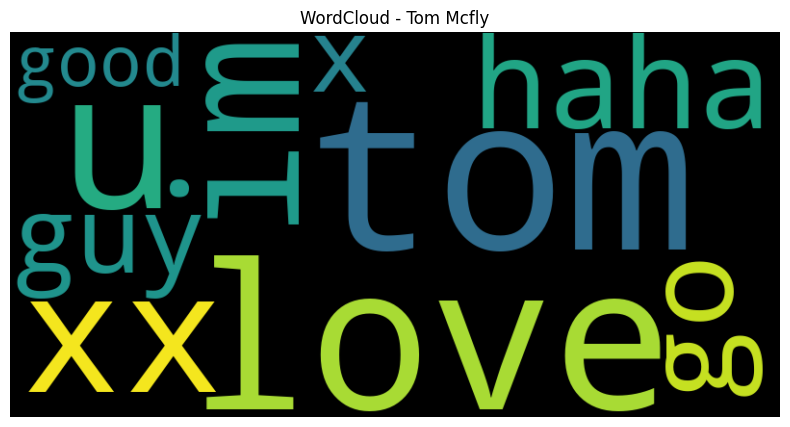

In [134]:
# Unir todos los tweets procesados en un solo texto
all_text = ' '.join(corpus_tommcfly['processed_tweet'])

# Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=10).generate(all_text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Tom Mcfly")
plt.show()


In [135]:
filas_demilovato =filas_per_at['@ddlovato']
filas_demilovato[:10]

[573, 7032, 7089, 8611, 9492, 12453, 12876, 13265, 13427, 13442]

In [136]:
v = tweets_df.iloc[filas_demilovato,[2,5]].reset_index()
corpus_demilovato= corpus_demilovato.drop('index', axis=1)
corpus_demilovato['len'] = corpus_demilovato['tweet'].apply(len)
corpus_demilovato

,timestamp,tweet,len
0,Mon Apr 06 22:58:30 PDT 2009,@ddlovato Do you hate us?? Please don't,40
1,Tue Apr 07 07:02:58 PDT 2009,@ddlovato Wish that i could see it.. Thats th...,96
2,Tue Apr 07 07:05:11 PDT 2009,"@ddlovato hey demi, wen are you and selena gon...",79
3,Fri Apr 17 20:31:31 PDT 2009,@ddlovato ahhhh i wish i could go to the dalla...,85
4,Fri Apr 17 21:56:12 PDT 2009,@ddlovato I just saw your tour dates and now I...,116
...,...,...,...
3150,Tue Jun 16 05:08:09 PDT 2009,@ddlovato is there a deluxe edition cause then...,92
3151,Tue Jun 16 05:09:58 PDT 2009,"@ddlovato Hahaha Demi, naughty Demi! I love y...",72
3152,Tue Jun 16 06:00:23 PDT 2009,@ddlovato hope to see you soon,31
3153,Tue Jun 16 06:12:27 PDT 2009,@ddlovato I VOTED!! =]]] can't wait,36


In [137]:
# Descargar los recursos necesarios de nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Definir las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Inicializar el stemmer y lematizador
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Función para limpiar y procesar el texto (remover stopwords, hacer stemming y lemmatización)
def preprocess_text(text):
    # Eliminar menciones (@usuario) y caracteres especiales
    text = re.sub(r'@\w+', '', text)  # Eliminar menciones
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Eliminar caracteres no alfabéticos
    text = text.lower()  # Convertir a minúsculas
    
    # Tokenizar (separar por palabras)
    tokens = text.split()
    
    # Remover stopwords y aplicar stemming y lemmatización
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Aplicar el preprocesamiento al corpus (columna de tweets)
corpus_demilovato['processed_tweet'] = corpus_demilovato['tweet'].apply(preprocess_text)

# Verificar algunos resultados
print(corpus_demilovato[['tweet', 'processed_tweet']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mack\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mack\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               tweet  \
0           @ddlovato Do you hate us?? Please don't    
1  @ddlovato Wish that i could see it..  Thats th...   
2  @ddlovato hey demi, wen are you and selena gon...   
3  @ddlovato ahhhh i wish i could go to the dalla...   
4  @ddlovato I just saw your tour dates and now I...   

                                     processed_tweet  
0                                  hate u pleas dont  
1  wish could see that downsid live sweden good l...  
2         hey demi wen selena gonna anoth video miss  
3        ahhhh wish could go dalla showbut wont near  
4  saw tour date sadyou come houston two day get ...  


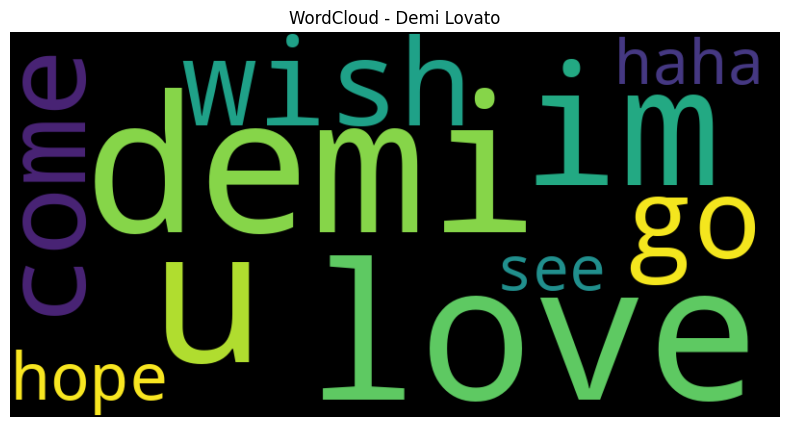

In [138]:
# Unir todos los tweets procesados en un solo texto
all_text = ' '.join(corpus_demilovato['processed_tweet'])

# Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=10).generate(all_text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Demi Lovato")
plt.show()

# Problema 2

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array

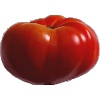

In [3]:
tomate_1 = load_img('Imagenes/FreshTomato/freshTomato (155).jpg')
tomate_1

In [4]:
datagen= ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

In [7]:
x= img_to_array(tomate_1)
x= x.reshape((1,)+x.shape)

i = 0
for img_instance in datagen.flow(x,batch_size = 1, save_to_dir='Imagenes' + '/Preview',save_format = 'jpg'):
    i =i+1
    if(i>50):
        break

### Data Aumentation y Input Data Flow para Train

In [73]:
data_train_path1 = 'Imagenes/train_set'

# mecanismo de data Augmentation para generar variaciones en las imágenes originales.
train_datagen= ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)
# carga y reconfiguracion de imagenes de entrada para clasificacion categorica
train_data_flow= train_datagen.flow_from_directory(
    data_train_path1,
    target_size= (64,64), #tamaño estandar de imagenes para entrenamiento
    batch_size = 32, # tamaño del batch de entrenamiento
    class_mode= 'categorical' # problema de clasificacion categorica
)

Found 2556 images belonging to 6 classes.


### Data Aumentation y Input Data Flow para Test

In [74]:
data_test_path1 = 'Imagenes/test_set'

# mecanismo de data Augmentation para generar variaciones en las imágenes originales.
test_datagen= ImageDataGenerator(
    rescale = 1./255,
)
# carga y reconfiguracion de imagenes de entrada para clasificacion categorica
test_data_flow= test_datagen.flow_from_directory(
    data_test_path1,
    target_size= (64,64), #tamaño estandar de imagenes para entrenamiento
    batch_size = 32, # tamaño del batch de entrenamiento
    class_mode= 'categorical' # problema de clasificacion categorica
)

Found 1108 images belonging to 6 classes.


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten


In [76]:
cnn_v1 =  Sequential()

cnn_v1.add(Conv2D(filters=1024,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))

cnn_v1.add(MaxPool2D(pool_size=(2,2)))

cnn_v1.add(Flatten())

cnn_v1.add(Dense(units=256,activation='relu'))

cnn_v1.add(Dense(units=6,activation='softmax'))

C:\Users\Mack\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
cnn_v1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
cnn_v1.fit(train_data_flow,
           steps_per_epoch =20,
           epochs = 20,
           validation_steps= 100,
           validation_data = test_data_flow)
            


Epoch 1/20


C:\Users\Mack\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.2104 - loss: 15.4663

C:\Users\Mack\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 977ms/step - accuracy: 0.2122 - loss: 15.1234 - val_accuracy: 0.2708 - val_loss: 1.8559
Epoch 2/20


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 968ms/step - accuracy: 0.3952 - loss: 1.5424 - val_accuracy: 0.4116 - val_loss: 1.9320
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 962ms/step - accuracy: 0.4316 - loss: 1.3609 - val_accuracy: 0.4088 - val_loss: 2.0791
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 962ms/step - accuracy: 0.5561 - loss: 1.1835 - val_accuracy: 0.4486 - val_loss: 2.0141
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4486 - val_loss: 2.0141
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 966ms/step - accuracy: 0.6393 - loss: 0.9991 - val_accuracy: 0.4874 - val_loss: 2.2686
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 965ms/step - accuracy: 0.6286 - loss: 1.0099 - val_accuracy: 0.5153 - val_loss: 2.1132
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 965ms/step - accuracy: 0.6968 - loss: 0.8527 - val_accuracy: 0.5117 - val_loss: 2.0049
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 966ms/step - accuracy: 0.6628 - loss: 0.9823 - val_accuracy

### Deep CNN

In [79]:
# CNN Profunda contiene mas capas convolucionales y pooling para captar mas caracteristicas y detalles complejos
cnn_v2 = Sequential()

cnn_v2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_v2.add(MaxPool2D(pool_size=(2, 2)))

cnn_v2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_v2.add(MaxPool2D(pool_size=(2, 2)))

cnn_v2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_v2.add(MaxPool2D(pool_size=(2, 2)))

cnn_v2.add(Flatten())
cnn_v2.add(Dense(256, activation='relu'))
cnn_v2.add(Dense(6, activation='softmax'))


In [80]:
cnn_v2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
cnn_v2.fit(train_data_flow,
           steps_per_epoch =20,
           epochs = 20,
           validation_steps= 100,
           validation_data = test_data_flow)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.1886 - loss: 1.8088 - val_accuracy: 0.1868 - val_loss: 2.0534
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.3736 - loss: 1.5607 - val_accuracy: 0.3303 - val_loss: 2.2360
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.4641 - loss: 1.3895 - val_accuracy: 0.4125 - val_loss: 2.0061
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.5218 - loss: 1.2897 - val_accuracy: 0.4161 - val_loss: 2.2251
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4161 - val_loss: 2.2251
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.5542 - loss: 1.2934 - val_accuracy: 0.5108 - val_loss: 1.8448
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.5833 - loss: 1.0877 - val_accuracy: 0.4747 - val_loss: 2.0506
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.6672 - loss: 0.8943 - val_accur

### GoogLeNet Inception

In [82]:
data_train_path2 = 'Imagenes/train_set'

# mecanismo de data Augmentation para generar variaciones en las imágenes originales.
train_datagen= ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)
# carga y reconfiguracion de imagenes de entrada para clasificacion categorica
train_data_flow= train_datagen.flow_from_directory(
    data_train_path2,
    target_size= (224,224), #tamaño estandar de imagenes para entrenamiento
    batch_size = 32, # tamaño del batch de entrenamiento
    class_mode= 'categorical' # problema de clasificacion categorica
)

Found 2556 images belonging to 6 classes.


In [83]:
data_test_path2 = 'Imagenes/test_set'

# mecanismo de data Augmentation para generar variaciones en las imágenes originales.
test_datagen= ImageDataGenerator(
    rescale = 1./255,
)
# carga y reconfiguracion de imagenes de entrada para clasificacion categorica
test_data_flow= test_datagen.flow_from_directory(
    data_test_path2,
    target_size= (224,224), #tamaño estandar de imagenes para entrenamiento
    batch_size = 32, # tamaño del batch de entrenamiento
    class_mode= 'categorical' # problema de clasificacion categorica
)

Found 1108 images belonging to 6 classes.


In [89]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar InceptionV3 sin la parte superior
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Añadir nuevas capas
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Capa de Global Average Pooling
x = Dropout(0.5)(x)  # Dropout para regularización
x = Dense(256, activation='relu')(x)  # Capa densa adicional
predictions = Dense(6, activation='softmax')(x)  # Capa de salida para 6 clases

# Crear el modelo final
cnn_v3 = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
cnn_v3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
#cnn_v3.summary()

# Preprocesamiento y aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalización
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Cargar imágenes en lotes
train_generator = train_datagen.flow_from_directory(
    data_train_path2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    data_test_path2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Entrenar el modelo
cnn_v3.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Found 2556 images belonging to 6 classes.
Found 1108 images belonging to 6 classes.
Epoch 1/20


C:\Users\Mack\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/80 ━━━━━━━━━━━━━━━━━━━━ 35s 926ms/step - accuracy: 0.7085 - loss: 0.8629

C:\Users\Mack\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


80/80 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.7677 - loss: 0.7283 - val_accuracy: 0.2202 - val_loss: 25.8257
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9022 - loss: 0.3309 - val_accuracy: 0.3502 - val_loss: 18.8719
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9156 - loss: 0.2958 - val_accuracy: 0.3032 - val_loss: 7.2513
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9631 - loss: 0.1383 - val_accuracy: 0.7256 - val_loss: 1.2448
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9675 - loss: 0.1329 - val_accuracy: 0.4982 - val_loss: 3.9157
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9543 - loss: 0.1613 - val_accuracy: 0.7726 - val_loss

In [91]:
#Guardar red neuronal despues de terminar el entrenamiento.
cnn_v3.save('Imagenes/cnn_v3.h5')

In [92]:
import cv2
import numpy as np


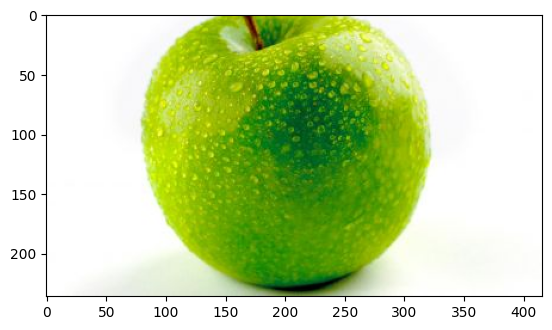

In [134]:
manzana_predict = cv2.imread('Imagenes/manzana.jpg')
manzana_predict = cv2.cvtColor(manzana_predict,cv2.COLOR_BGR2RGB)

plt.imshow(manzana_predict)
plt.show()

In [138]:
img = cv2.resize(manzana_predict,(224,224))
img= img.astype('float32')/255.

img= np.expand_dims(img, axis= 0)

In [139]:
prediccion= cnn_v3.predict(img)
prediccion

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.576674  , 0.01140299, 0.15636043, 0.02705718, 0.02818808,
        0.20031734]], dtype=float32)

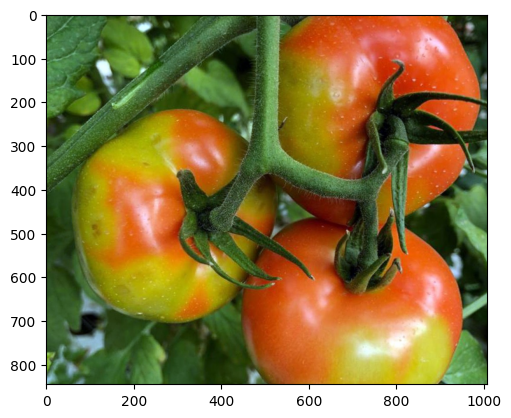

In [140]:
tomate_predict = cv2.imread('Imagenes/tomate.jpeg')
tomate_predict = cv2.cvtColor(tomate_predict,cv2.COLOR_BGR2RGB)

plt.imshow(tomate_predict)
plt.show()

In [144]:
img2 = cv2.resize(tomate_predict,(224,224))
img2= img2.astype('float32')/255.

img2= np.expand_dims(img2, axis= 0)

In [145]:
prediccion2= cnn_v3.predict(img2)
prediccion2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.00660389, 0.00397357, 0.00352199, 0.00340969, 0.05846331,
        0.92402756]], dtype=float32)

La CNN que tuvo resultados mas exitosos fue la GoogLeNet/Inception,
la razon por la que esta red neuronal tuvo mejores resultados se debe a que implementa bloques de Inception, que son bloques que permiten procesar las entradas de diferentes filtros y tamaños de kernel en paralelo y concatena salidas.
Estos bloques contienen:
- Convoluciones de 1x1,3x3 y 5x5
- Maxpooling
- Concatenan todas las salidas anteriores

Esto le permite a la arquitectura de Inception captar características a diferentes escalas simultaneamente.

De la misma manera para trabajr con GoogLeNet es necesario que las imagenes ajusten su tamaño a 224x224